# gbolahan-project-drivers-alertness

Use the "Run" button to execute the code.


Intalling the required libraries

Importing Some required tools

In [1]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

 ## Downloading the dataset from Kaggle
 
 The dataset is available at https://www.kaggle.com/c/stayalert/data .

We'll use the opendatasets library to download the data from Kaggle directly within Jupyter.

In [2]:
od.download('https://www.kaggle.com/c/stayalert/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ainagbolahan
Your Kaggle Key: ········


100%|██████████████████████████████████████████████████████████████████████████████| 18.2M/18.2M [00:30<00:00, 620kB/s]



Extracting archive .\stayalert/stayalert.zip to .\stayalert


In [3]:
import os
os.listdir('stayalert')


['example_submission.csv', 'fordTest.csv', 'fordTrain.csv', 'Solution.csv']

The objective of this challenge is to design a detector/classifier that will detect whether the driver is alert or not alert, employing any combination of vehicular, environmental and driver physiological data that are acquired while driving.

The third column 'IsAlert' has a value X for each row where
               X = 1     if the driver is alert
               X = 0     if the driver is not alert
My Job is to design a classifier that will predict "1" for is alert and "0" if the driver is not alert

In [4]:
train = pd.read_csv('stayalert/fordTrain.csv')

In [5]:
train

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.8950,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.96,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.8950,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.98,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.97,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,101.99,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.1670,0,0.000,0.00,1,-20,0.015875,324,1,1,1,57,0.0,102.07,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604324,510,1194,1,32.0051,10.13240,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8113
604325,510,1195,1,32.0393,12.45040,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.51,0.280,240,3.01875,0,1801,0,30.4,0,4,15.8018
604326,510,1196,1,32.0762,10.06180,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.56,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8120
604327,510,1197,1,32.1154,17.84500,800,75.0000,0.081731,680,88.2353,0,17.807,222.11,0,0,0.016379,322,2,2,1,64,0.0,91.56,0.175,240,3.01875,0,1800,0,31.3,0,4,15.8270


In [6]:
train.head(10)

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.96,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.98,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.97,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.99,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,102.07,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757
5,0,5,0,34.3729,13.64440,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,102.00,0.280,752,5.99375,0,2016,0,13.4,0,4,14.7498
6,0,6,0,34.3851,10.16540,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,102.01,0.175,752,5.99375,0,2016,0,13.4,0,4,14.7578
7,0,7,0,34.4313,13.32700,1400,42.8571,0.290601,576,104.167,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.93,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7729
8,0,8,0,34.4970,17.71240,1400,42.8571,0.290601,592,101.351,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.88,0.070,752,5.99375,0,2011,0,13.4,0,4,14.7835
9,0,9,0,34.5994,6.88282,1400,42.8571,0.290601,592,101.351,0,0.0,0.0,1,-20,0.015875,324,1,1,1,57,0.0,101.93,0.175,752,5.99375,0,2012,0,13.4,0,4,14.7757


The Test Data will be store as the test variable

In [7]:
test = pd.read_csv('stayalert/fordTest.csv')

Previewing a part of the data to understand the data

In [8]:
test.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,P8,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,?,38.4294,10.9435,1000,60.0,0.302277,508,118.110,0,0.0,0.0,4,4,0.015434,328,1,1,1,64,0.0,108.57,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1937
1,0,1,?,38.3609,15.3212,1000,60.0,0.302277,508,118.110,0,0.0,0.0,4,4,0.015434,328,1,1,1,64,0.0,108.57,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1744
2,0,2,?,38.2342,11.5140,1000,60.0,0.302277,508,118.110,0,0.0,0.0,4,8,0.015938,328,1,1,1,65,0.0,108.65,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1602
3,0,3,?,37.9304,12.2615,1000,60.0,0.302277,508,118.110,0,0.0,0.0,4,8,0.015938,328,1,1,1,65,0.0,108.65,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1725
4,0,4,?,37.8085,12.3666,1000,60.0,0.302277,504,119.048,0,0.0,0.0,4,8,0.015938,328,1,1,1,65,0.0,108.57,0.00,255,4.50625,0,2136,0,17.6,0,4,16.1459


Here we will divide the data into the Input and Target Data

In [9]:
input_col = list(train.columns)[3:]
target_col = list(train.columns)[2:3]
input_col_test = list(test.columns)[3:]
target_col_test = list(test.columns)[2:3]

train_inputs = train[input_col]
train_target = train[target_col]
test_inputs = test[input_col_test]



In [10]:
train_target.columns

Index(['IsAlert'], dtype='object')

In [11]:
test_inputs.columns

Index(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'E1', 'E2', 'E3', 'E4',
       'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'V1', 'V2', 'V3', 'V4',
       'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11'],
      dtype='object')

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120840 entries, 0 to 120839
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  120840 non-null  int64  
 1   ObsNum   120840 non-null  int64  
 2   IsAlert  120840 non-null  object 
 3   P1       120840 non-null  float64
 4   P2       120840 non-null  float64
 5   P3       120840 non-null  int64  
 6   P4       120840 non-null  float64
 7   P5       120840 non-null  float64
 8   P6       120840 non-null  int64  
 9   P7       120840 non-null  float64
 10  P8       120840 non-null  int64  
 11  E1       120840 non-null  float64
 12  E2       120840 non-null  float64
 13  E3       120840 non-null  int64  
 14  E4       120840 non-null  int64  
 15  E5       120840 non-null  float64
 16  E6       120840 non-null  int64  
 17  E7       120840 non-null  int64  
 18  E8       120840 non-null  int64  
 19  E9       120840 non-null  int64  
 20  E10      120840 non-null  

# Building the Model
## Scaling Numeric figure

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(train_inputs)
scaler_1 = MinMaxScaler().fit(test_inputs)

In [14]:
train_input = scaler.transform(train_inputs)
test_input = scaler_1.transform(test_inputs)

## Dividing the data into training and Validation test set

In [15]:
from sklearn.model_selection import train_test_split

x = train_inputs
y = train_target

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3,random_state= 42)

In [16]:
train_inputs.columns

Index(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'E1', 'E2', 'E3', 'E4',
       'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'V1', 'V2', 'V3', 'V4',
       'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11'],
      dtype='object')

In [22]:
print('Len of x_train is :', len(x_train))
print('Len of y_train is :', len(y_train))
print('Len of x_val is :', len(x_val))
print('Len of y_val is :', len(y_val))

Len of x_train is : 423030
Len of y_train is : 423030
Len of x_val is : 181299
Len of y_val is : 181299


# First Model
## Analyzing the driver alertness data using LogisticsRegression

In [23]:
%%time
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(x_train,y_train.values.ravel())

Wall time: 46 s


LogisticRegression(solver='liblinear')

In [24]:
print(model.coef_.tolist())

[[-0.013860193336123584, -0.0007919646577638865, -0.00028269033080931147, -0.004248835883584277, 0.2073806723244129, 0.0014204174902896008, 0.02435797437447584, 0.0, 0.006221155962180677, -0.0009349482957690767, 0.14107333005412473, -0.0005885815595746579, -0.02475634833179607, -0.015187440381878265, -0.044168834661641544, -0.22743821950226165, 3.0503666487236214, 0.007526327354865266, -0.0024824383934497363, -0.011987872951172186, -0.044193638735712165, -0.00039220533409056946, -0.00016460789543692154, -0.07309910266875563, 0.0003352684714158553, 0.0, -0.006761215288420565, 0.0, -0.1940414433862421, 0.1988967295843336]]


model.predict(x_train, Y_train)

In [25]:
print(model.intercept_)

[0.03705201]


## Predicting class labels for samples in x_train

In [26]:
train_preds = model.predict(x_train)

In [27]:
train_preds

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [28]:
val_preds = model.predict(x_val)

In [29]:
val_preds

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

## Returning the mean accuracy on the given test data and labels.

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score( y_val ,  val_preds)

0.7867500648100652

In [33]:
accuracy_score( y_train ,  train_preds)

0.7856913221284543

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_train, train_preds, normalize='true')

array([[0.71024679, 0.28975321],
       [0.15943668, 0.84056332]])

In [36]:
model.classes_

array([0, 1], dtype=int64)

## Defining a helper function

In [37]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 78.57%


array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

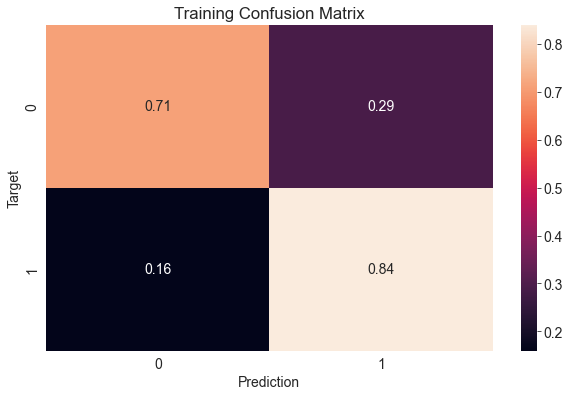

In [38]:
train_predict = predict_and_plot(x_train, y_train, 'Training')
train_predict

Accuracy: 78.68%


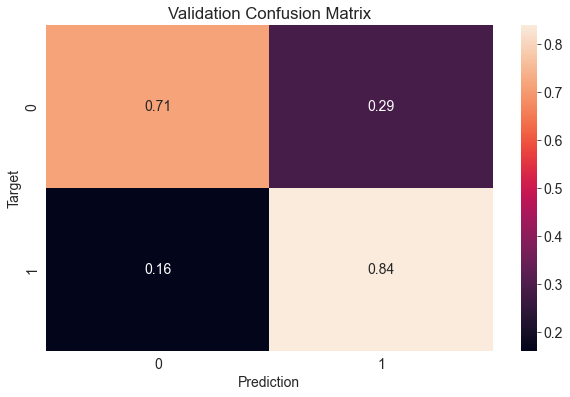

In [39]:
val_predict = predict_and_plot(x_val, y_val ,'Validation')

## To check if the model is better than a model with random guesses and a model that has all inputs a no


In [40]:
def random_guess(inputs):
    return np.random.choice([1 , 0 ], len(inputs))

In [41]:
def all_no(inputs):
    return np.full(len(inputs), 0 )

In [42]:
random_guess = accuracy_score(train_preds, random_guess(y_train))

In [43]:
all_no = accuracy_score(train_preds, all_no(y_train))

In [44]:
print('Model with all no is {}%:'.format(all_no * 100))
print('Model with random no is {}%:'.format(random_guess * 100))


Model with all no is 39.13646786279933%:
Model with random no is 49.95224924946221%:


##  My random model achieves an accuracy of 78.68% while the model with random no achieves 50% and "always No" model achieves an accuracy of 37%.

### My model is better than a "dumb" or "random" model!


## Making Predictions with Random Forest classifier
I'll use the RandomForestClassifier class from sklearn.ensemble.



In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [47]:
%%time
model.fit(x_train, y_train.values.ravel())


Wall time: 1min 40s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [48]:
dt = model.score(x_train, y_train)
dt

0.9999976361014585

In [49]:
model.score(x_val, y_val)

0.99302257596567

In [50]:
train_probs = model.predict_proba(x_train)
train_probs

array([[0.  , 1.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       ...,
       [1.  , 0.  ],
       [0.95, 0.05],
       [0.01, 0.99]])

In [51]:
prob = model.predict(x_val)
prob

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [52]:
from sklearn.tree import plot_tree, export_text

In [53]:
model.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1608637542)

In [54]:
x_train.columns

Index(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'E1', 'E2', 'E3', 'E4',
       'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'V1', 'V2', 'V3', 'V4',
       'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11'],
      dtype='object')

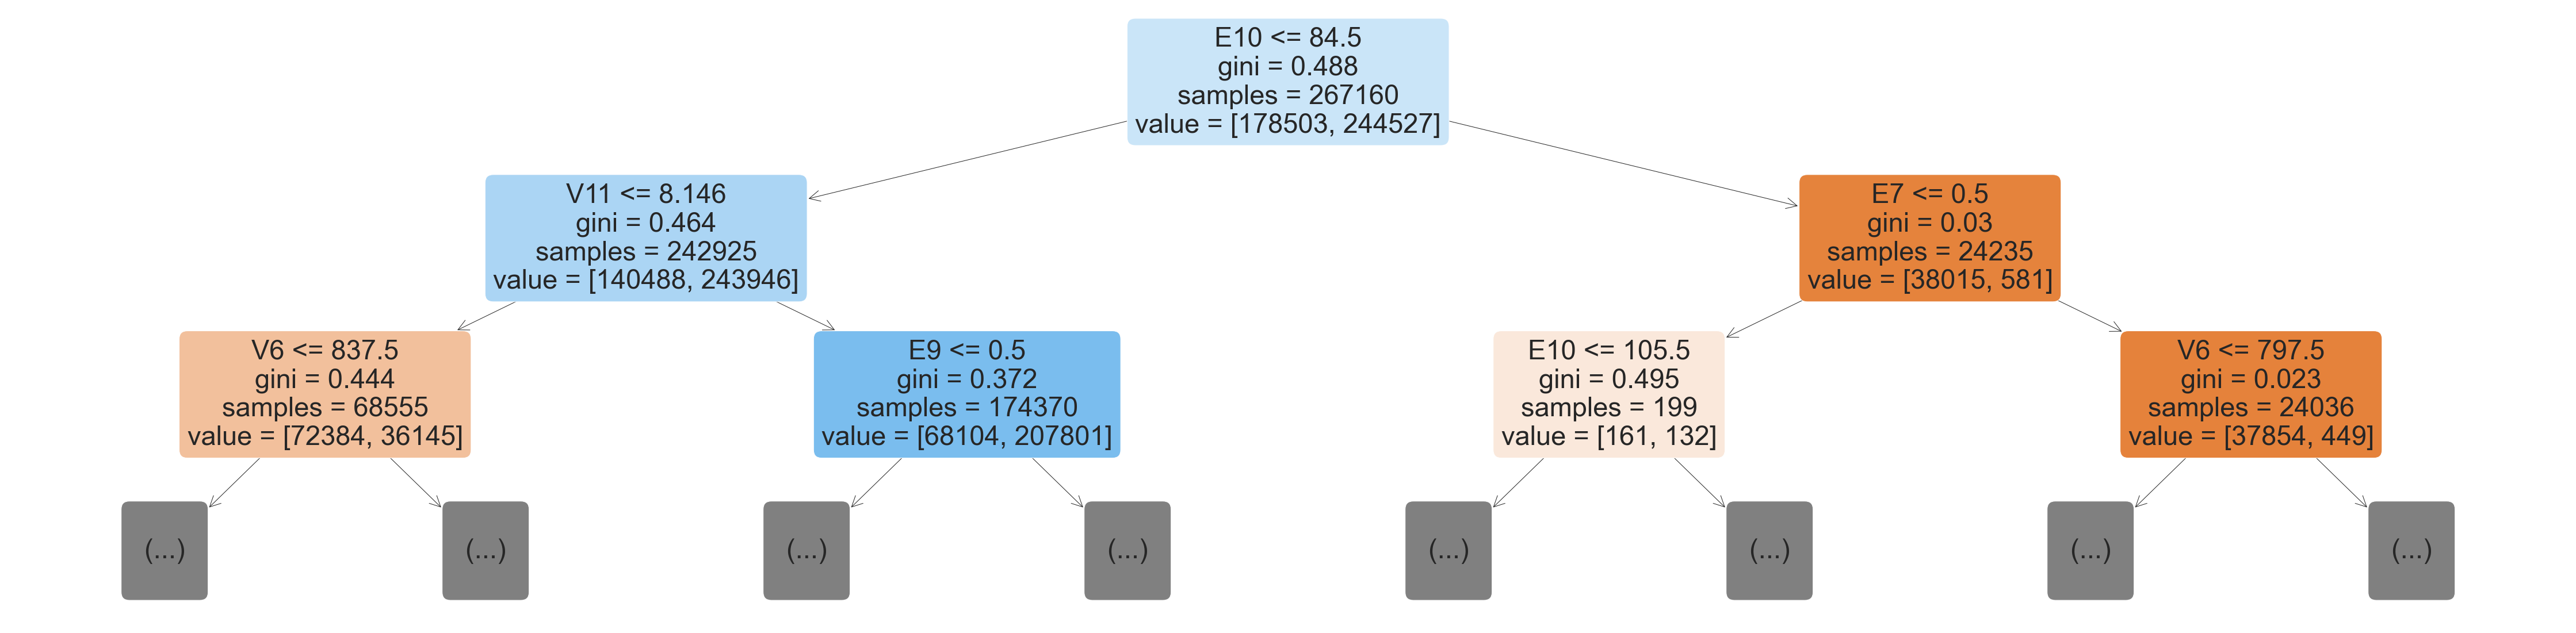

In [55]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=x_train.columns, filled=True, rounded=True);

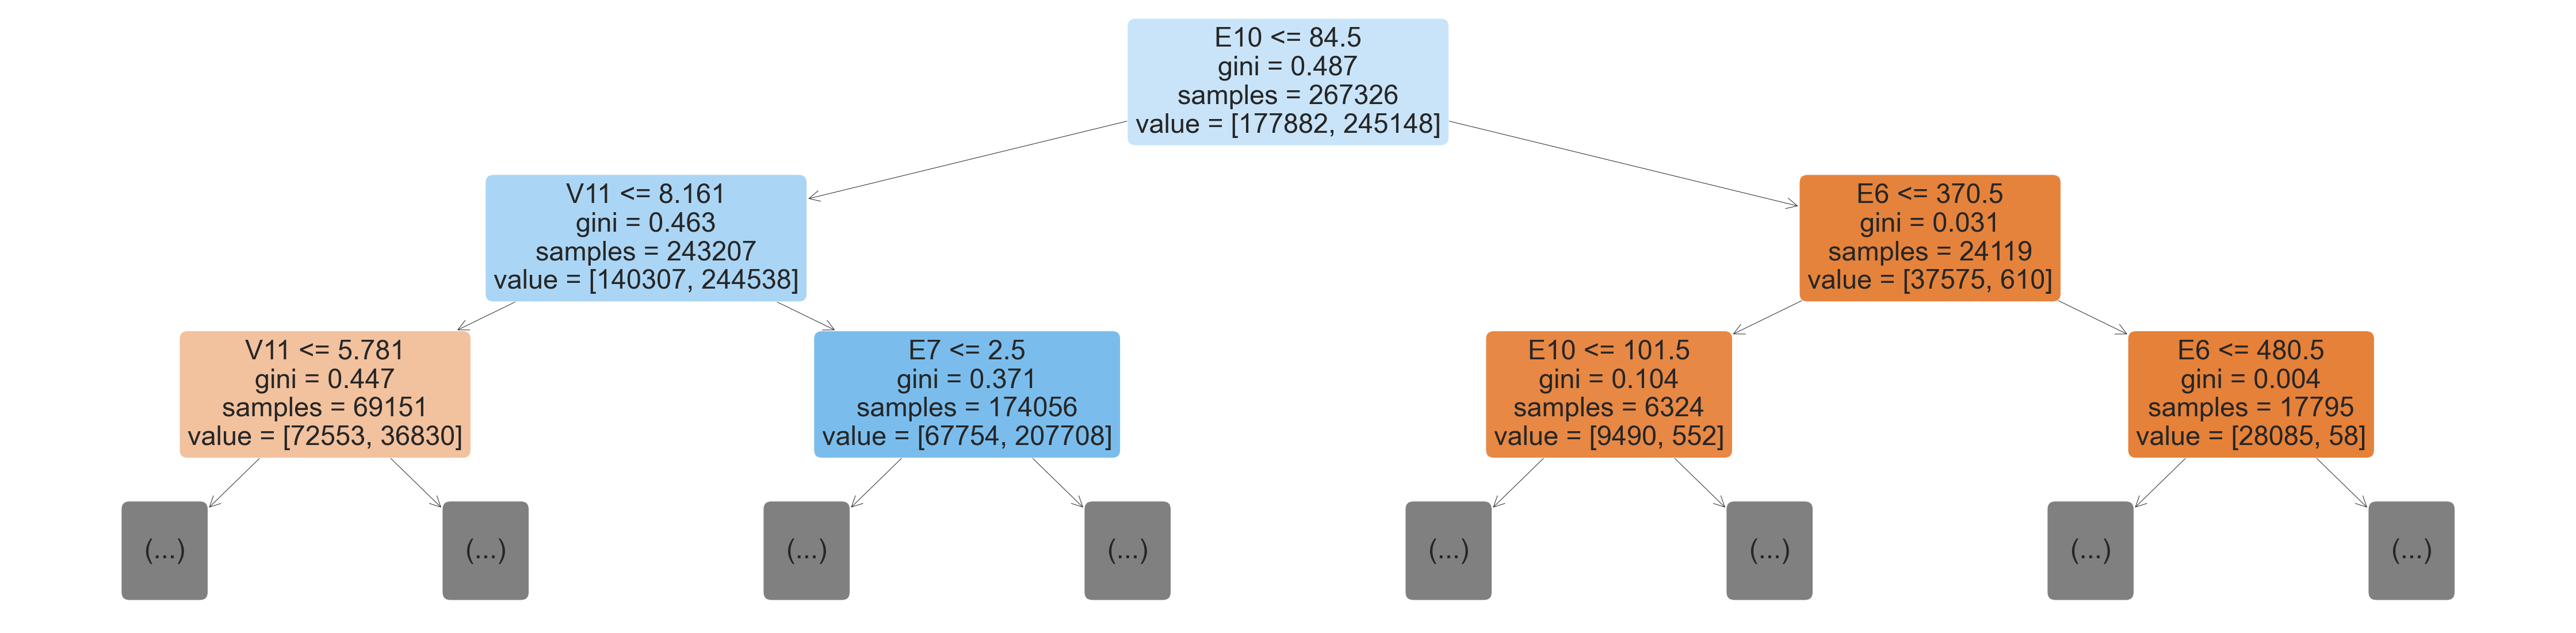

In [56]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[20], max_depth=2, feature_names=x_train.columns, filled=True, rounded=True);

In [57]:
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [58]:
importance_df

,feature,importance
29,V11,0.149978
17,E10,0.098233
15,E8,0.065003
19,V1,0.060373
14,E7,0.059381
6,P7,0.057648
5,P6,0.055761
16,E9,0.055153
13,E6,0.054694
4,P5,0.045992


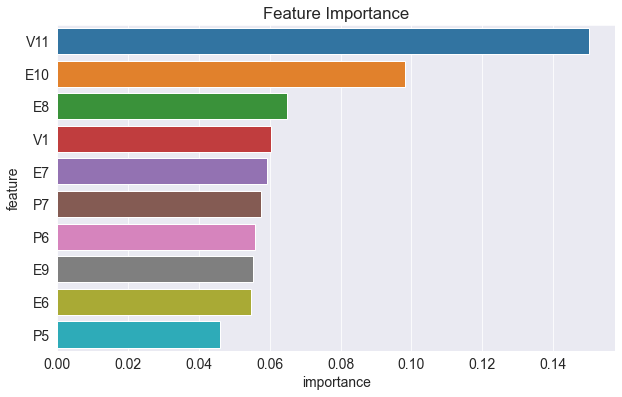

In [59]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Hyperparameter Tuning with Random Forests

Just like decision trees, random forests also have several hyperparameters. In fact many of these hyperparameters are applied to the underlying decision trees. 

Let's study some the hyperparameters for random forests. You can learn more about them here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Let's create a base model with which we can compare models with tuned hyperparameters.


In [60]:
model_ = RandomForestClassifier(random_state=42, n_jobs=-1)

In [61]:
base_model = model_.fit(x_train, y_train.values.ravel())

In [62]:
base_train_acc = base_model.score(x_train, y_train)
base_val_acc = base_model.score(x_val, y_val)

In [63]:
base_accs = base_train_acc, base_val_acc
base_accs

(0.9999976361014585, 0.99302257596567)

### `n_estimators`

This argument controls the number of decision trees in the random forest. The default value is 100. For larger datasets, it helps to have a greater number of estimators. As a general rule, try to have as few estimators as needed. 


**12 estimators**

In [64]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=12)

In [65]:
model.fit(x_train, y_train)

C:\Users\DELLXP~1\AppData\Local\Temp/ipykernel_4560/940050797.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RandomForestClassifier(n_estimators=12, n_jobs=-1, random_state=42)

In [66]:
model.score(x_train, y_train), model.score(x_val, y_val)

(0.9998628938845945, 0.99207386692701)

**I tried 300,200, 50 estimators and 150 seems to give the best reslt**

In [67]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=150)
model.fit(x_train, y_train)

C:\Users\DELLXP~1\AppData\Local\Temp/ipykernel_4560/2764237981.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=42)

In [68]:
model.score(x_train, y_train)

1.0

In [69]:
model.score(x_val, y_val)

0.9930667019674682

In [70]:
base_accs

(0.9999976361014585, 0.99302257596567)

### `max_depth` and `max_leaf_nodes`

These arguments are passed directly to each decision tree, and control the maximum depth and max. no leaf nodes of each tree respectively. By default, no maximum depth is specified, which is why each tree has a training accuracy of 100%. You can specify a `max_depth` to reduce overfitting.

<img src="https://i.imgur.com/EJCrSZw.png" width="480">


In [71]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(x_train, y_train.values.ravel())
    return model.score(x_train, y_train), model.score(x_val, y_val)

In [72]:
test_params(max_depth=6)

(0.8610713188189962, 0.8607493698255368)

In [73]:
test_params(max_depth=20)

(0.9792591541971019, 0.9732651586605552)

In [74]:
test_params(max_leaf_nodes=2**2)

(0.8044086707798501, 0.8043011820252731)

In [75]:
test_params(max_leaf_nodes=2**12)


(0.9761175330354821, 0.9717483273487444)

In [76]:
base_accs # no max depth or max leaf nodes

(0.9999976361014585, 0.99302257596567)

### `max_features`

Instead of picking all features (columns) for every split, we can specify that only a fraction of features be chosen randomly to figure out a split.

<img src="https://i.imgur.com/FXGWMDY.png" width="720">

Notice that the default value `auto` causes only $\sqrt{n}$ out of total features ( $n$ ) to be chosen randomly at each split. This is the reason each decision tree in the forest is different. While it may seem counterintuitive, choosing all features for every split of every tree will lead to identical trees, so the random forest will not generalize well. 

In [77]:
test_params(max_features='log2')

(0.9999976361014585, 0.9924268749413951)

In [78]:
test_params(max_features='sqrt')

(0.9999976361014585, 0.99302257596567)

In [79]:
test_params(max_features=3)

(0.9999976361014585, 0.9916932801615012)

In [80]:
test_params(max_features=12)

(0.9999976361014585, 0.993447288732977)

In [81]:
test_params(max_features=13)

(0.9999976361014585, 0.9936017297392705)

In [82]:
test_params(max_features=18)

(0.9999976361014585, 0.9933204264778074)

In [83]:
base_accs

(0.9999976361014585, 0.99302257596567)

### `min_samples_split` and `min_samples_leaf`

By default, the decision tree classifier tries to split every node that has 2 or more. You can increase the values of these arguments to change this behavior and reduce overfitting, especially for very large datasets.

In [84]:
test_params(min_samples_split=3, min_samples_leaf=2)

(0.9990520766848687, 0.9891339720572093)

In [85]:
test_params(min_samples_split=2, min_samples_leaf=2)

(0.9990520766848687, 0.9891339720572093)

In [86]:
base_accs

(0.9999976361014585, 0.99302257596567)

### `min_impurity_decrease`

This argument is used to control the threshold for splitting nodes. A node will be split if this split induces a decrease of the impurity (Gini index) greater than or equal to this value. It's default value is 0, and you can increase it to reduce overfitting.



In [87]:
test_params(min_impurity_decrease=1e-9)

(0.9999976361014585, 0.9930336074661195)

In [88]:
test_params(min_impurity_decrease=1e-2)

(0.8360399971633218, 0.8356637378032973)

In [89]:
base_accs

(0.9999976361014585, 0.99302257596567)

### `bootstrap`, `max_samples` 

By default, a random forest doesn't use the entire dataset for training each decision tree. Instead it applies a technique called bootstrapping. For each tree, rows from the dataset are picked one by one randomly, with replacement i.e. some rows may not show up at all, while some rows may show up multiple times.


<img src="https://i.imgur.com/W8UGaEA.png" width="640">

Bootstrapping helps the random forest generalize better, because each decision tree only sees a fraction of th training set, and some rows randomly get higher weightage than others.

In [ ]:
test_params(bootstrap=False)

In [ ]:
base_accs

When bootstrapping is enabled, you we also control the number or fraction of rows to be considered for each bootstrap using `max_samples`. This can further generalize the model.

<img src="https://i.imgur.com/rsdrL1W.png" width="640">

In [ ]:
test_params(max_samples=0.9)

In [ ]:
base_accs

### Putting it together

Let's train a random forest with customized hyperparameters based on our learnings. Of course, different hyperpraams

In [91]:
model = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=150,
                               max_features=13,
                               
                               min_impurity_decrease=1e-9)

In [92]:
model.fit(x_train, y_train.values.ravel())

RandomForestClassifier(max_features=13, min_impurity_decrease=1e-09,
                       n_estimators=150, n_jobs=-1, random_state=42)

In [93]:
model.score(x_train, y_train), model.score(x_val, y_val)

(1.0, 0.9935355407365732)

In [94]:
base_accs

(0.9999976361014585, 0.99302257596567)

We've increased the accuracy from 99.99%  to 100% with a well-tuned random forest.

This could be due to any of the following reasons:

- We may not have found the right mix of hyperparameters to regularize (reduce overfitting) the model properly, and we should keep trying to improve the model.

- We may have reached the limits of the modeling technique we're currently using (Random Forests), and we should try another modeling technique e.g. gradient boosting.

- We may have reached the limits of what we can predict using the given amount of data, and we may need more data to improve the model.

- We may have reached the limits of how well we can predict whether it will rain tomorrow using the given weather measurements, and we may need more features (columns) to further improve the model. In many cases, we can also generate new features using existing features (this is called feature engineering).

- Whether it will rain tomorrow may be an inherently random or chaotic phenomenon which simply cannot be predicted beyond a certain accuracy any amount of data for any number of weather measurements with any modeling technique.  

Remember that ultimately all models are wrong, but some are useful. If you can rely on the model we've created today to make a travel decision for tomorrow, then the model is useful, even though it may sometimes be wrong.

Finally, let's also compute the accuracy of our model on the test set.

In [ ]:
test_inputs = test[input_col_test]
test_target = pd.read_csv('stayalert/Solution.csv')

In [ ]:
target_col_test = list(test_target.columns)[2:3]

In [ ]:
test_targets = test_target[target_col_test]

In [ ]:
test_inputs.info()

In [ ]:
test_targets

In [ ]:
submission = model.predict(test_inputs)

In [ ]:
submission

In [ ]:
model.score(test_inputs,test_targets)

## Making Submission

In [ ]:
submission_df = pd.read_csv('stayalert/example_submission.csv')

In [ ]:
submission_df['Prediction']  = submission

In [ ]:
submission_df

In [ ]:
submission_df.to_csv('submission.csv', index=None)

## Summary

Using the model LogisticRegression i was able to achieve a 78.68% accuracy on my validation model 
while with the Random forest classsification i was able to achive a 80.2% on my test input.
This clearly shows that the random forest classifcation is better and with more tweaing i can achive a better result with the random forest classifier

## Summary and References

The following were covered in this project:

- Downloading a real-world dataset
- Preparing a dataset for training
- Training and interpreting decision trees
- Training and interpreting random forests
- Overfitting, hyperparameter tuning & regularization
- Making predictions on single inputs



I also used  the following terms:

* Logistics regression
* Random forest
* Overfitting
* Hyperparameter
* Hyperparameter tuning
* Regularization
* Generalization
* Bootstrapping


Check out the following resources to learn more: 

-https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/lesson/random-forests-and-regularization

-https://jovian.ai/outlink?url=https%3A%2F%2Fscikit-learn.org%2Fstable%2Fmodules%2Fgenerated%2Fsklearn.ensemble.RandomForestClassifier.html

-https://jovian.ai/outlink?url=https%3A%2F%2Fwww.kaggle.com%2Fc%2Fstayalert

In [96]:
# saving the model 
import pickle 
pickle_out = open("model.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()